In [2]:
!pip install scipy

In [13]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian

from scipy.ndimage import gaussian_filter


def praat_spectrogram(
    filepath,
    sr=None,
    window_length_sec=0.005,
    hop_length_sec=0.002,
    max_freq=5000,
    dynamic_range=50,
    preemph_cutoff=50,
    cmap='gray_r',
    smoothing_sigma=1.5,  # new!
    show_colorbar=True,
    show_plot=True
):

    # Load audio
    y, sr = librosa.load(filepath, sr=sr)

    # Pre-emphasis
    pre_emph_coeff = np.exp(-2 * np.pi * preemph_cutoff / sr)
    y = np.append(y[0], y[1:] - pre_emph_coeff * y[:-1])

    # Window/hop
    win_length = int(window_length_sec * sr)
    hop_length = int(hop_length_sec * sr)
    n_fft = 2 ** int(np.ceil(np.log2(win_length)))
    window = gaussian(win_length, std=win_length / 6)

    # STFT
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length,
                     win_length=win_length, window=window)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    # Dynamic range limit
    S_db[S_db < (np.max(S_db) - dynamic_range)] = np.max(S_db) - dynamic_range

    # 2D smoothing
    if smoothing_sigma:
        S_db = gaussian_filter(S_db, sigma=[smoothing_sigma, smoothing_sigma])

    # Plot
    if show_plot:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_db, sr=sr, hop_length=hop_length,
                                 x_axis='time', y_axis='hz', cmap=cmap)
        if show_colorbar:
            plt.colorbar(label='dB')
        plt.title('Praat-like Spectrogram (Smoothed)')
        plt.ylim(0, max_freq)
        plt.tight_layout()
        plt.show()

    return S_db, sr


In [8]:
# load an example wav using librosa
import librosa
import numpy as np
import matplotlib.pyplot as plt

example = librosa.example('libri1')

In [9]:
example

'/root/.cache/librosa/5703-47212-0000.ogg'

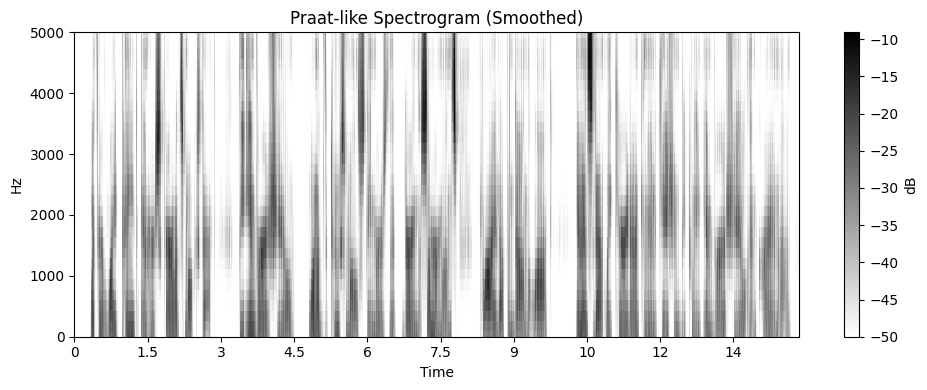

(array([[-50.        , -50.        , -50.        , ..., -49.99093281,
         -49.99808617, -49.99971852],
        [-50.        , -50.        , -50.        , ..., -49.99382851,
         -49.99868061, -49.9997993 ],
        [-50.        , -50.        , -50.        , ..., -49.99622704,
         -49.99894022, -49.9997306 ],
        ...,
        [-50.        , -50.        , -50.        , ..., -50.        ,
         -50.        , -50.        ],
        [-50.        , -50.        , -50.        , ..., -50.        ,
         -50.        , -50.        ],
        [-50.        , -50.        , -50.        , ..., -50.        ,
         -50.        , -50.        ]]),
 22050)

In [14]:
praat_spectrogram(example)